In [242]:
%matplotlib inline

In [243]:
import pandas as pd

In [471]:
import matplotlib.pyplot as plt

In [472]:
# dfz = pd.read_csv('/Users/cchio/Downloads/zz_zip.csv')
dfz = pd.read_csv('/Users/cchio/Desktop/zz_all_us_race.csv')
dfc = pd.read_csv('/Users/cchio/Desktop/Consumer_Complaints.csv')

In [509]:
dfz.zipcode = dfz.zipcode.astype(str)
dfc.zipcode = dfc.zipcode.astype(str)

In [510]:
dfm = pd.merge(dfz, dfc, on='zipcode', how='inner')
dfm.to_csv("/Users/cchio/Desktop/merged_output.csv")
print dfm.columns

Index([u'zipcode', u'percentage_asian', u'percentage_black',
       u'percentage_two_or_more', u'percentage_white', u'percentage_other',
       u'Date received', u'Product', u'Sub-product', u'Issue', u'Sub-issue',
       u'Consumer complaint narrative', u'Company public response', u'Company',
       u'State', u'Tags', u'Consumer consent provided?', u'Submitted via',
       u'Date sent to company', u'Company response to consumer',
       u'Timely response?', u'Consumer disputed?', u'Complaint ID'],
      dtype='object')


In [511]:
# ally = dfm[dfm.Company == 'Ally Financial Inc.']
# ally = ally[ally['Product'] == 'Consumer Loan']
# dfm = ally

# honda = dfm[dfm.Company == 'American Honda Finance Corporation']
# dfm = honda

# ocwen = dfm[dfm.Company == 'Ocwen']
# dfm = ocwen

# toyota = dfm[dfm.Company == 'Toyota Motor Credit Corporation']
# dfm = toyota

# good one
# gm = dfm[dfm.Company == 'GM Financial']
# dfm = gm

# good one
# ford = dfm[dfm.Company == 'Ford Motor Credit Company']
# dfm = ford

# wells = dfm[dfm.Company == 'Wells Fargo & Company']
# dfm = wells

# ezcorp = dfm[dfm.Company == 'EZCORP, Inc.']
# dfm = ezcorp

delbert = dfm[dfm.Company == 'Delbert Services']
dfm = delbert

# entire category
# prod_mort = dfm[dfm.Product == 'Mortgage']
# dfm = prod_mort

# entire category
# veh_loan = dfm[dfm.Subproduct == 'Vehicle loan']
# dfm = veh_loan

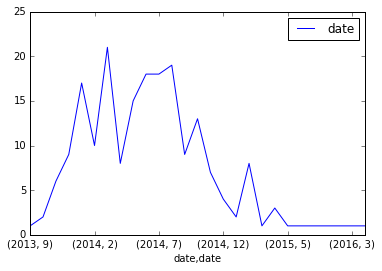

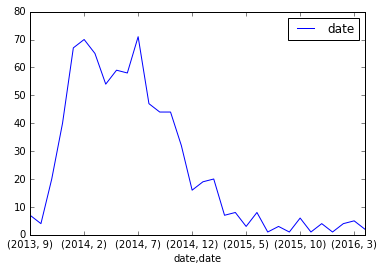

In [512]:
# dfm_dates = dfm['Date received'].to_frame()
# dfm_dates.columns = ['date']
# dfm_dates = pd.to_datetime(dfm_dates['date']).to_frame()
# # dates_black = dates_black[dates_black.date.dt.year == 2015]
# # black = dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.month, dates_black.date.dt.day]).count()
# dfm_dates.groupby([dfm_dates.date.dt.year, dfm_dates.date.dt.month, dfm_dates.date.dt.day]).count().plot(kind='bar')

black_top_quartile = dfm.percentage_black.quantile(q=0.75)
dates_black = dfm[dfm.percentage_black > black_top_quartile]['Date received'].to_frame()
dates_black.columns = ['date']
dates_black = pd.to_datetime(dates_black['date']).to_frame()
# dates_black = dates_black[dates_black.date.dt.year == 2015]
# black = dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.month, dates_black.date.dt.day]).count()
# dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.month, dates_black.date.dt.day]).count().plot()
# dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.week]).count().plot()
dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.month]).count().plot()

dates = dfm['Date received'].to_frame()
dates.columns = ['date']
dates = pd.to_datetime(dates['date']).to_frame()
# dates = dates[dates.date.dt.year == 2015]
# all = dates.groupby([dates.date.dt.year, dates.date.dt.month, dates.date.dt.day]).count()
# dates.groupby([dates.date.dt.year, dates.date.dt.month, dates.date.dt.day]).count().plot()
# dates.groupby([dates.date.dt.year, dates.date.dt.month, dates.date.dt.week]).count().plot()
dates.groupby([dates.date.dt.year, dates.date.dt.month]).count().plot()
# kind='bar'

In [513]:
# black_payday_loan = dfm[dfm.Product == 'Payday loan']
# black_payday_loan = black_payday_loan[black_payday_loan.percentage_black > black_top_quartile]
# black = black_payday_loan
# dates_black = black_payday_loan['Date received'].to_frame()
# dates_black.columns = ['date']
# dates_black = pd.to_datetime(dates_black['date']).to_frame()
# black = dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.month, dates_black.date.dt.day]).count()

# all_payday_loan = dfm[dfm.Product == 'Payday loan']
# dates = all_payday_loan
# dates = dates['Date received'].to_frame()
# dates.columns = ['date']
# dates = pd.to_datetime(dates['date']).to_frame()
# all = dates.groupby([dates.date.dt.year, dates.date.dt.month, dates.date.dt.day]).count()

date    0.036496
dtype: float64


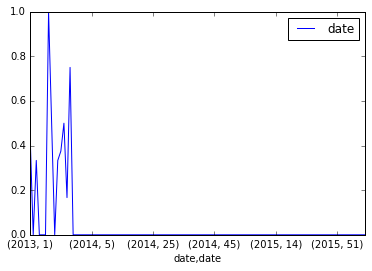

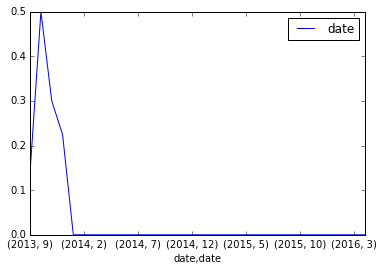

In [526]:
black_all_count_ratio = black.divide(all, fill_value=0)
# black_all_count_ratio.plot()

black_week = dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.week]).count()
all_week = dates.groupby([dates.date.dt.year, dates.date.dt.week]).count()
black_all_week_count_ratio = black_week.divide(all_week, fill_value=0)
black_all_week_count_ratio.plot()

black_month = dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.month]).count()
all_month = dates.groupby([dates.date.dt.year, dates.date.dt.month]).count()
black_all_month_count_ratio = black_month.divide(all_month, fill_value=0)
black_all_month_count_ratio.plot()

print black_all_month_count_ratio.mean()
# print black_all_month_count_ratio